In [1]:
import pandas as pd

In [2]:
f2 = pd.read_sas('../data/spxraw_g.sas7bdat')

f2.head()

,SEQN,SPATTYPE,SPAMANU,SPAFACT,SPAPOS,SPAPLAT,SPAACC,SPAQEFF,SPXPTS,SPXRAW
0,62161.0,b'Pre',1.0,1.075,b'Standing',b'Y',b'N',b'D',945.0,"b'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
1,62161.0,b'Pre',2.0,1.075,b'Standing',b'Y',b'N',b'D',1186.0,"b'0,0,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
2,62161.0,b'Pre',3.0,1.075,b'Standing',b'N',b'N',b'D',346.0,"b'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
3,62161.0,b'Pre',4.0,1.075,b'Standing',b'N',b'N',b'D',270.0,"b'0,0,0,1,0,1,2,1,2,2,1,2,2,2,2,1,2,1,2,1,1,1,..."
4,62161.0,b'Pre',5.0,1.075,b'Standing',b'Y',b'Y',b'A',807.0,"b'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."


In [3]:
f3 = pd.read_sas('../data/MCQ_G.xpt')

In [4]:
f3.head()

,SEQN,MCQ010,MCQ025,MCQ035,MCQ040,MCQ050,MCQ051,MCQ053,MCQ070,MCQ075,...,MCQ300C,MCQ365A,MCQ365B,MCQ365C,MCQ365D,MCQ370A,MCQ370B,MCQ370C,MCQ370D,MCQ380
0,62161.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,...,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN
1,62162.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62163.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,62164.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,NaN
4,62165.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = pd.merge(f2, f3, how='inner', on='SEQN')

In [6]:
df.count()

SEQN        37661
SPATTYPE    37661
SPAMANU     37661
SPAFACT     37661
SPAPOS      37661
            ...  
MCQ370A     26611
MCQ370B     26611
MCQ370C     26611
MCQ370D     26611
MCQ380       6316
Length: 101, dtype: int64

In [7]:
[x for x in df.columns.tolist() if x.endswith("K")]

['MCQ160K', 'MCQ170K', 'MCQ180K', 'MCQ240DK', 'MCQ240K']

In [9]:
f = pd.read_csv('../data/NHANES_2007_2012_Only_Acceptable_Spirometry_Values.csv')

df = pd.merge(df, f, how='inner', on='SEQN')

In [10]:
df_prep = df[['SEQN', 'MCQ170K', 'Sex', 'MCQ035', 'SPXRAW', 'Age']]

In [11]:
cols = ['SEQN', 'MCQ170K', 'Sex', 'MCQ035', 'Age']

In [12]:
import seaborn as sns

<Axes: xlabel='Sex', ylabel='Count'>

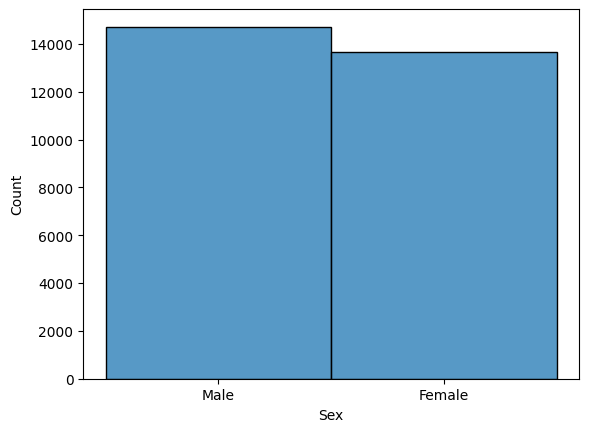

In [13]:
sns.histplot(df_prep.Sex)

<Axes: xlabel='Age', ylabel='Count'>

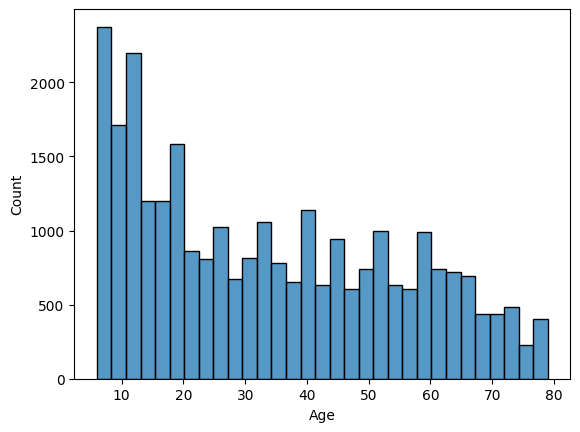

In [14]:
sns.histplot(df_prep.Age)

<Axes: xlabel='MCQ170K', ylabel='Count'>

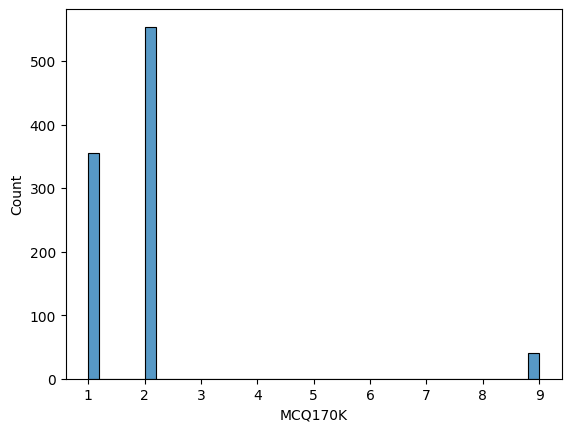

In [15]:
sns.histplot(df_prep.MCQ170K)

<Axes: xlabel='MCQ035', ylabel='Count'>

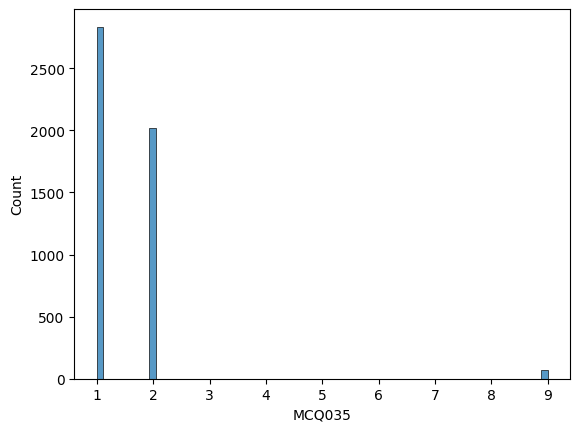

In [17]:
sns.histplot(df_prep.MCQ035)

In [19]:
df_prep.MCQ170K.value_counts()

MCQ170K
2.0    554
1.0    356
9.0     41
Name: count, dtype: int64

In [21]:
df_prep.to_pickle("../data/prepared_dataset.pickle")